# Technical Assignment 2

Link Dataset : https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset <br>




## Import Library

In [1]:
import numpy as np # untuk linear algebra
import pandas as pd # untuk data processing

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

## Load & Read Dataset

In [2]:
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# cek dimensi dataset
df.shape

(10000, 14)

In [4]:
# cek statistik deskriptif dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

`Machine Failure` melacak proses gagal jika setidaknya salah satu dari 5 berikut terpicu <br>
1.   Tool wear failure (TWF),
2.   Heat dissipation failure (HDF),
3.   Power failure (PWF)
4.   Overstrain failure (OSF)
5.   Random failures (RNF)

# Data Conditioning

Mencari baris data yang menunjukkan ketidakkonsistenan. <br>

Kondisi ketidakkonsistenan berupa:
1.   Kondisi 1 : `Machine failure` bernilai 1 tetapi semua mode kegagalan bernilai 0
2.   Kondisi 2 : `Machine failure` bernilai 0 tetapi setidaknya satu mode kegagalan bernilai 1



In [6]:
condition_1 = (
    (df['Machine failure'] == 1) &
    (df['TWF'] == 0) &
    (df['HDF'] == 0) &
    (df['PWF'] == 0) &
    (df['OSF'] == 0) &
    (df['RNF'] == 0)
)

condition_2 = (
    (df['Machine failure'] == 0) &
    ((df['TWF'] == 1) |
     (df['HDF'] == 1) |
     (df['PWF'] == 1) |
     (df['OSF'] == 1) |
     (df['RNF'] == 1))
)

print(f"Ditemukan {len(df[condition_1])} instance 'Machine failure' dengan tidak ada mode kegagalan yang terpicu.")
print(f"Ditemukan {len(df[condition_2])} instance mode kegagalan terpicu tanpa 'Machine failure'.")

Ditemukan 9 instance 'Machine failure' dengan tidak ada mode kegagalan yang terpicu.
Ditemukan 18 instance mode kegagalan terpicu tanpa 'Machine failure'.


In [7]:
# memperbaiki inkonsistensi dalam data berdasarkan skenario kondisi data
df.loc[condition_1, 'Machine failure'] = 0
df.loc[condition_2, 'Machine failure'] = 1

# EDA

memvisualisasikan jumlah setiap mode kegagalan dalam set data untuk memahami frekuensi data.

<ipython-input-8-ced6dff42cdc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=mode, data=df, palette='coolwarm')
<ipython-input-8-ced6dff42cdc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=mode, data=df, palette='coolwarm')
<ipython-input-8-ced6dff42cdc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=mode, data=df, palette='coolwarm')
<ipython-input-8-ced6dff42cdc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

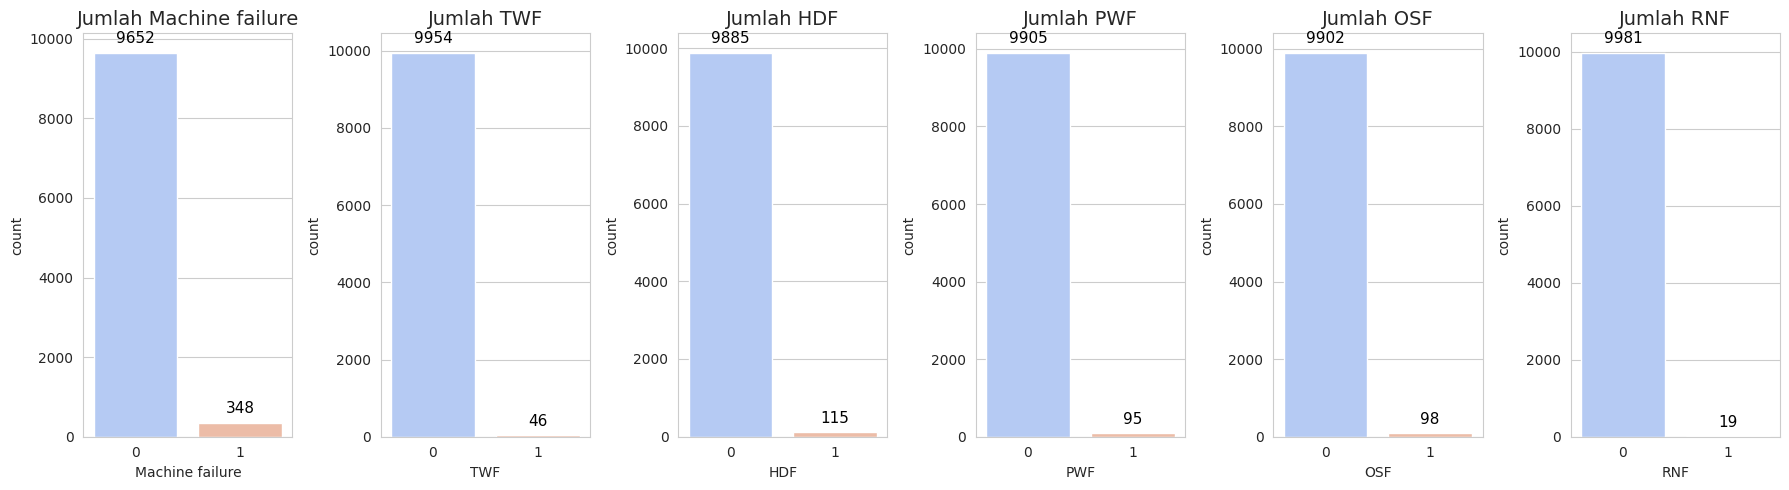

In [8]:
sns.set_style("whitegrid")

# Daftar mode kegagalan untuk visualisasi
failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Plotting the bar charts for each failure mode
plt.figure(figsize=(18, 5))
for i, mode in enumerate(failure_modes, 1):
    plt.subplot(1, 6, i)
    ax = sns.countplot(x=mode, data=df, palette='coolwarm')
    ax.set_title(f'Jumlah {mode}', fontsize=14)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

Dari informasi visualisasi tersebut, 348 kali (3,48%) kegagalan terjadi dari 10.000 data pemrosesan yang ada. Mode kegagalan yang paling umum dari 5 mode kegagalan adalah HDF (1,15%), kemudian OSF, PWF, TWF dan yang paling sedikit adalah RNF (0,19%).


## Mengetahui distribusi kegagalan berdasarkan kualitas mesin (machine quality)

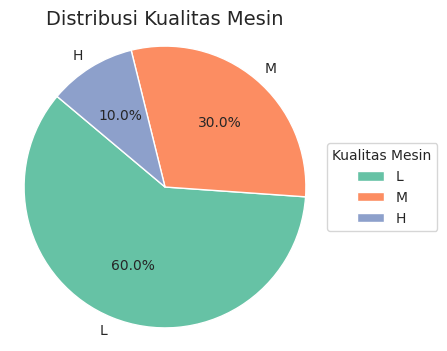

In [9]:
machine_qualities = df['Type'].value_counts()
labels = machine_qualities.index
counts = machine_qualities.values

# Menyiapkan palet warna untuk perbedaan visual yang lebih baik
colors = sns.color_palette("Set2", len(labels))

# Membuat pie chart dengan label yang lebih deskriptif dan legenda
plt.figure(figsize=(4, 4))  # Mengatur ukuran gambar untuk keterbacaan yang lebih baik
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Kualitas Mesin', fontsize=14)
plt.legend(labels, title="Kualitas Mesin", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  # Aspek rasio yang sama memastikan pie digambar sebagai lingkaran.
plt.show()

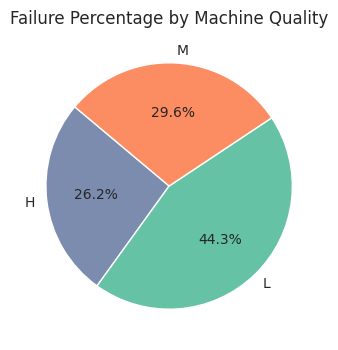

In [10]:
# menghitung jumlah kegagalan untuk setiap jenis mesin ('Type')
failure_counts = df.groupby('Type')['Machine failure'].sum().reset_index()
failure_counts.columns = ['Machine Quality', 'Failure Count']

# menghitung total jumlah setiap jenis mesin ('Type')
value_counts = df['Type'].value_counts().reset_index()
value_counts.columns = ['Machine Quality', 'Total Count']

# menggabungkan keduanya untuk kegagalan vs total jumlah
failure_counts = failure_counts.merge(value_counts, on='Machine Quality')
failure_counts['Failure Percentage'] = (failure_counts['Failure Count'] / failure_counts['Total Count']) * 100

colors = {'L': '#65c2a5', 'M': '#fc8d62', 'H': '#7b8caf'}

plt.figure(figsize=(4, 4))
plt.pie(failure_counts['Failure Percentage'], labels=failure_counts['Machine Quality'],
        autopct='%1.1f%%', startangle=140, colors=[colors[label] for label in failure_counts['Machine Quality']])
plt.title('Failure Percentage by Machine Quality')
plt.show()

Berdasarkan visualisasi, mesin-mesin 'Low Quality' mengalami kerusakan dengan persentase yang lebih tinggi dibandingkan dengan mesin-mesin 'High Quality' dan 'Medium Quality'. Hal ini dapat mengindikasikan perlunya jadwal perawatan yang lebih sering atau pemeriksaan kualitas untuk mesin berkualitas rendah. Selain itu, tidak ada perbedaan yang signifikan antara kualitas tinggi dan menengah.

# Feature Engineering

`UDI` dan `Product ID` tidak memuat informasi penting untuk model informasi sehingga dapat dihilangkan

In [11]:
df = df.drop(["UDI", "Product ID"], axis=1)

membuat copy dari dataframe dan menambahkan kolom baru #Adding new columns to the copy of df based on the information of data descrption, these features directly affect the failures


In [12]:
# membuat salinan dari df dan menambahkan kolom baru berdasarkan informasi dari deskripsi data
df_with_new_features = df.copy()

# Kolom-kolom dipilih karena secara langsung memengaruhi kegagalan
df_with_new_features['Temperature difference [k]']= df_with_new_features['Process temperature [K]'] - df_with_new_features['Air temperature [K]']
df_with_new_features['Power [W]'] = df_with_new_features['Torque [Nm]'] * df_with_new_features['Rotational speed [rpm]'] * 0.104719755
df_with_new_features['Strain [minNm]'] = df_with_new_features['Torque [Nm]'] * df_with_new_features['Tool wear [min]']

In [13]:
df_with_new_features.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature difference [k],Power [W],Strain [minNm]
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.590552,0.0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.722716,138.9
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.387534,247.0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.504652,276.5
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.816602,360.0


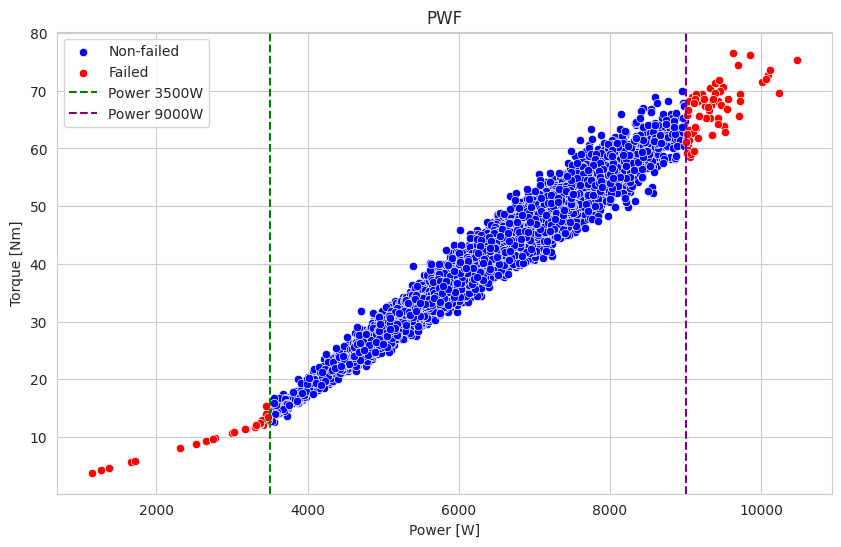

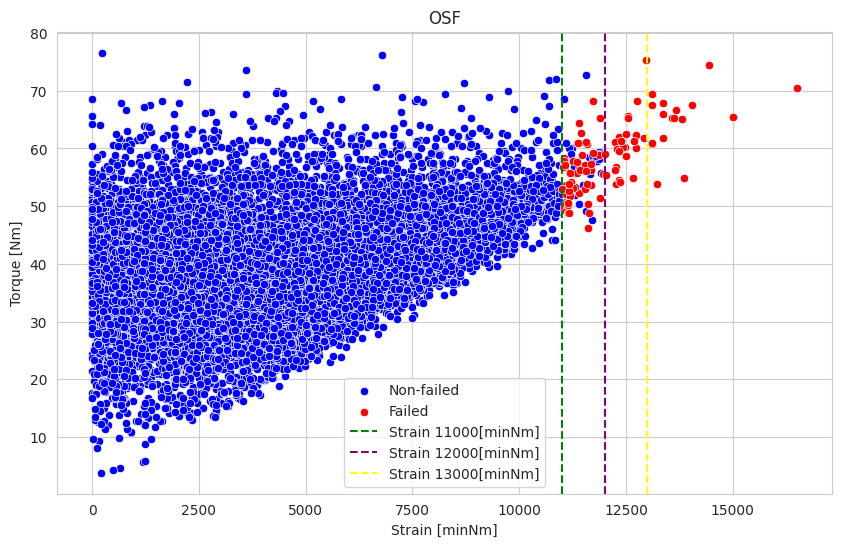

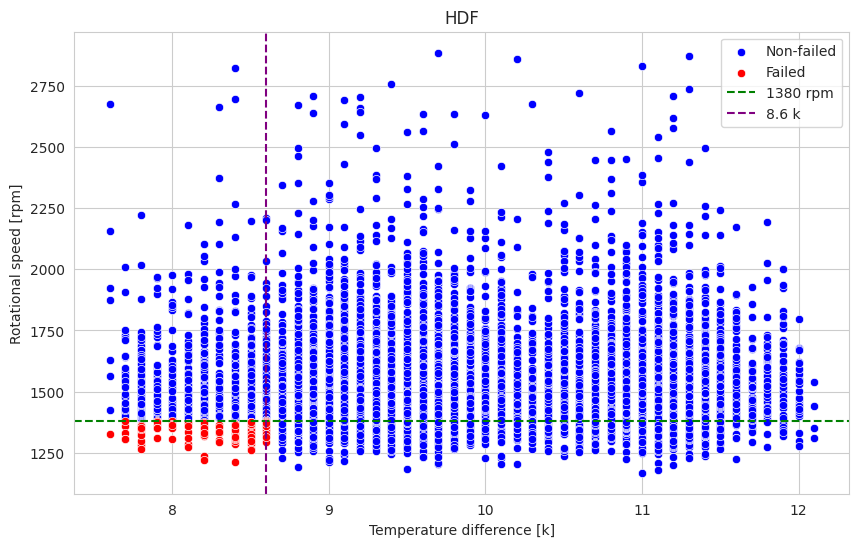

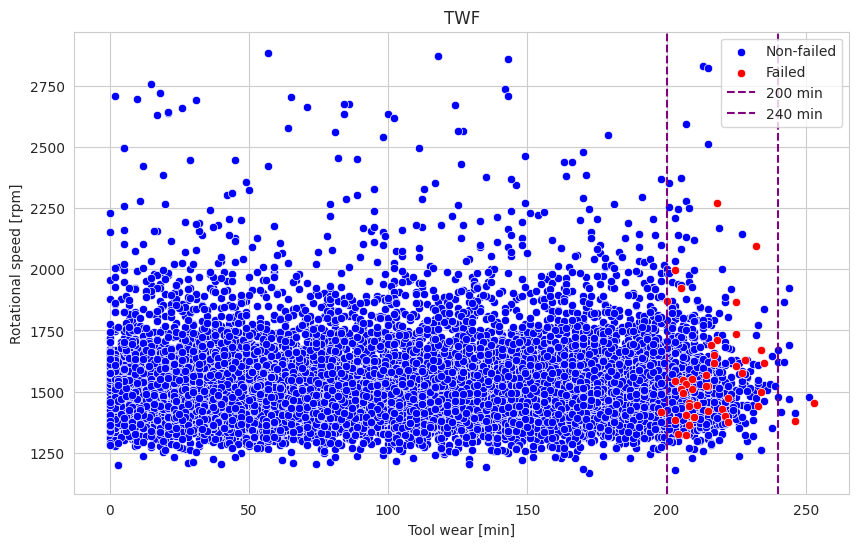

In [14]:
plt.figure(figsize=(10, 6))

# PWF
# Plot the data points for non-failed machines based on 'Power [W]' and 'Torque [Nm]'
sns.scatterplot(data=df_with_new_features[df_with_new_features['PWF'] == 0], x='Power [W]', y='Torque [Nm]', color='blue', label='Non-failed')
# Plot the data points for failed machines based on 'Power [W]' and 'Torque [Nm]'
sns.scatterplot(data=df_with_new_features[df_with_new_features['PWF'] == 1], x='Power [W]', y='Torque [Nm]', color='red', label='Failed')
# Add a vertical dashed line at Power 3500W for reference
plt.axvline(3500, color='green', linestyle='--', label='Power 3500W')
# Add a vertical dashed line at Power 9000W for reference
plt.axvline(9000, color='purple', linestyle='--', label='Power 9000W')
plt.xlabel('Power [W]')
plt.ylabel('Torque [Nm]')
plt.title('PWF')
plt.legend()
plt.show()

# OSF
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_new_features[df_with_new_features['OSF'] == 0], x='Strain [minNm]', y='Torque [Nm]', color='blue', label='Non-failed')
sns.scatterplot(data=df_with_new_features[df_with_new_features['OSF'] == 1], x='Strain [minNm]', y='Torque [Nm]', color='red', label='Failed')
plt.axvline(11000, color='green', linestyle='--', label='Strain 11000[minNm]')
plt.axvline(12000, color='purple', linestyle='--', label='Strain 12000[minNm]')
plt.axvline(13000, color='yellow', linestyle='--', label='Strain 13000[minNm]')
plt.xlabel('Strain [minNm]')
plt.ylabel('Torque [Nm]')
plt.title('OSF')
plt.legend()
plt.show()

# HDF
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_new_features[df_with_new_features['HDF'] == 0], x='Temperature difference [k]', y='Rotational speed [rpm]', color='blue', label='Non-failed')
sns.scatterplot(data=df_with_new_features[df_with_new_features['HDF'] == 1], x='Temperature difference [k]', y='Rotational speed [rpm]', color='red', label='Failed')
plt.axhline(1380, color='green', linestyle='--', label='1380 rpm')
plt.axvline(8.6, color='purple', linestyle='--', label='8.6 k')
plt.xlabel('Temperature difference [k]')
plt.ylabel('Rotational speed [rpm]')
plt.title('HDF')
plt.legend()
plt.show()

# TWF
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_new_features[df_with_new_features['TWF'] == 0], x='Tool wear [min]', y='Rotational speed [rpm]', color='blue', label='Non-failed')
sns.scatterplot(data=df_with_new_features[df_with_new_features['TWF'] == 1], x='Tool wear [min]', y='Rotational speed [rpm]', color='red', label='Failed')
plt.axvline(200, color='purple', linestyle='--', label='200 min')
plt.axvline(240, color='purple', linestyle='--', label='240 min')
plt.xlabel('Tool wear [min]')
plt.ylabel('Rotational speed [rpm]')
plt.title('TWF')
plt.legend()
plt.show()

Seperti yang ditunjukkan pada grafik,
*   PMF dipicu ketika power kurang dari 3500 W atau lebih dari 9000 W.
*   OSF sangat terkait dengan quality dan strain of machines.
*   HDF sangat terkait dengan perbedaan suhu dan kecepatan putaran mesin.
*   Pada waktu keausan pahat yang lebih tinggii, Tool Wear Failure lebih mungkin terjadi.

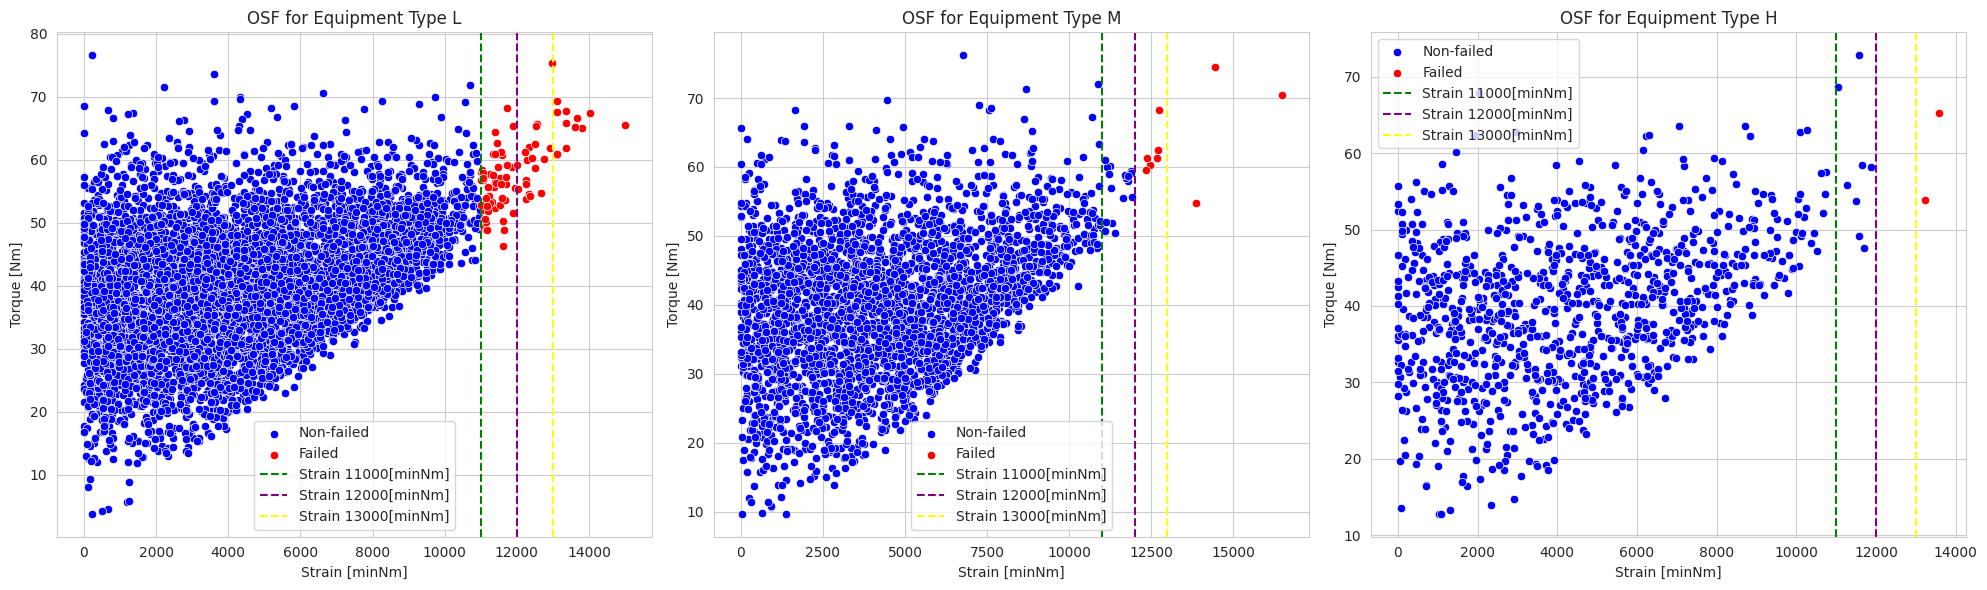

In [15]:
# Diving more into OSF mode of failure
# Looking into OSF mode of failure for each type of machines (L, M and H):
types = ["L", "M", "H"]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, equipment_type in enumerate(types):
    filtered_data = df_with_new_features[df_with_new_features['Type'] == equipment_type] # Filter the data based on the current equipment type
    sns.scatterplot(data=filtered_data[filtered_data['OSF'] == 0], x='Strain [minNm]', y='Torque [Nm]', color='blue', label='Non-failed', ax=axes[i]) # Plot data points for non-failed machines of the current equipment type using blue color
    sns.scatterplot(data=filtered_data[filtered_data['OSF'] == 1], x='Strain [minNm]', y='Torque [Nm]', color='red', label='Failed', ax=axes[i]) # Plot data points for failed machines of the current equipment type using red color

    axes[i].axvline(11000, color='green', linestyle='--', label='Strain 11000[minNm]')
    axes[i].axvline(12000, color='purple', linestyle='--', label='Strain 12000[minNm]')
    axes[i].axvline(13000, color='yellow', linestyle='--', label='Strain 13000[minNm]')

    # Set x and y labels
    axes[i].set_xlabel('Strain [minNm]')
    axes[i].set_ylabel('Torque [Nm]')
    axes[i].set_title(f'OSF for Equipment Type {equipment_type}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Berdasarkan outputnya, setiap jenis mesin memiliki batas regangan yang ketat untuk mode kegagalan OSF.

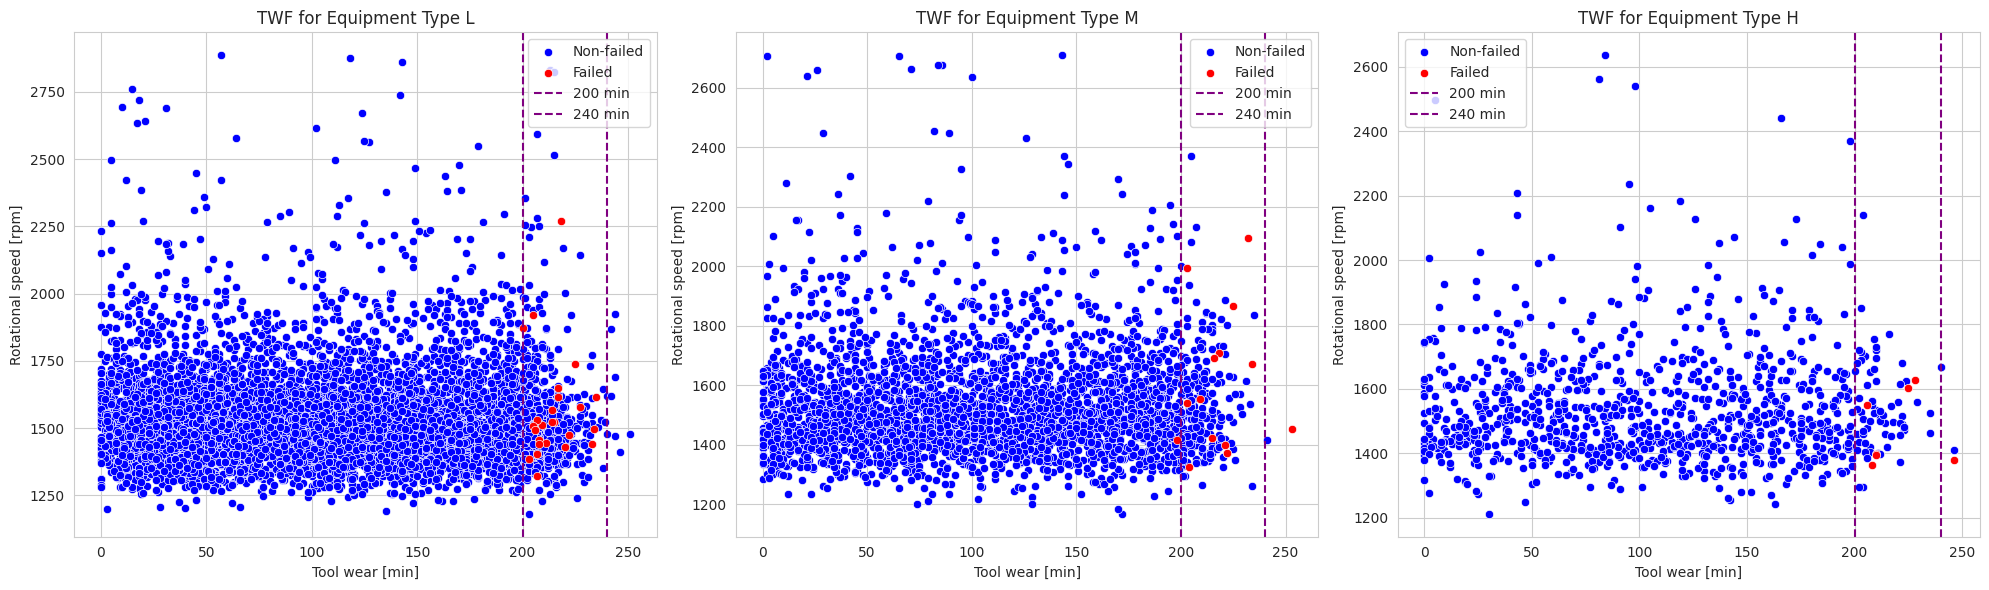

In [16]:
# Diving more into TWF mode of failure,
# Looking into TWF mode of failure for each type of machines (L, M and H):
types = ["L", "M", "H"]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, equipment_type in enumerate(types):
    filtered_data = df_with_new_features[df_with_new_features['Type'] == equipment_type]
    sns.scatterplot(data=filtered_data[filtered_data['TWF'] == 0], x='Tool wear [min]', y='Rotational speed [rpm]', color='blue', label='Non-failed', ax=axes[i])
    sns.scatterplot(data=filtered_data[filtered_data['TWF'] == 1], x='Tool wear [min]', y='Rotational speed [rpm]', color='red', label='Failed', ax=axes[i])

    axes[i].axvline(200, color='purple', linestyle='--', label='200 min')
    axes[i].axvline(240, color='purple', linestyle='--', label='240 min')

    axes[i].set_xlabel('Tool wear [min]')
    axes[i].set_ylabel('Rotational speed [rpm]')
    axes[i].set_title(f'TWF for Equipment Type {equipment_type}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Diperoleh hasil faktor pengaruh yang random untuk TWF versus tool wear time dan jenis mesin yang berbeda.

In [17]:
# encoding
b_map = {'L': 0, 'M': 1, 'H':2}
df['Type'] = df['Type'].map(b_map)
df_with_new_features['Type'] = df_with_new_features['Type'].map(b_map)

# Modelling

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

Modelling with original feature

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

models = {}
results_original_features = []

for failure_mode in failure_modes:
    X = df.drop(failure_modes, axis=1)
    y = df[failure_mode]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)

    y_pred = decision_tree.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    models[failure_mode] = {
        'model': decision_tree,
        'accuracy': accuracy,
        'classification_report': classification_rep,
        'confusion_matrix': conf_matrix,
    }
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    results_original_features.append({
        'Failure Mode': failure_mode,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

metrics_df = pd.DataFrame(results_original_features)

print(metrics_df)
print("-" * 50)

for failure_mode in failure_modes:
    print(f"Model metrics for {failure_mode}:")
    print(f"Accuracy: {models[failure_mode]['accuracy']:.2f}")
    print("Classification Report:\n", models[failure_mode]['classification_report'])
    print("Confusion Matrix:\n", models[failure_mode]['confusion_matrix'])
    print("-" * 50)


      Failure Mode  Accuracy  Precision    Recall  F1-Score
0  Machine failure     0.974   0.658824  0.708861  0.682927
1              TWF     0.993   0.000000  0.000000  0.000000
2              HDF     0.997   0.909091  0.909091  0.909091
3              PWF     0.996   0.761905  0.842105  0.800000
4              OSF     0.998   0.850000  0.944444  0.894737
5              RNF     0.994   0.000000  0.000000  0.000000
--------------------------------------------------
Model metrics for Machine failure:
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1921
           1       0.66      0.71      0.68        79

    accuracy                           0.97      2000
   macro avg       0.82      0.85      0.83      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix:
 [[1892   29]
 [  23   56]]
--------------------------------------------------
Model metrics for TWF:
Accuracy

Modelling dengan featured engineering

In [20]:
failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

models = {}
results_new_features = []

for failure_mode in failure_modes:
    X = df_with_new_features.drop(failure_modes, axis=1)
    y = df_with_new_features[failure_mode]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)

    y_pred = decision_tree.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    models[failure_mode] = {
        'model': decision_tree,
        'accuracy': accuracy,
        'classification_report': classification_rep,
        'confusion_matrix': conf_matrix,
    }

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    results_new_features.append({
        'Failure Mode': failure_mode,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

metrics_df = pd.DataFrame(results_new_features)

print(metrics_df)
print("-" * 50)


for failure_mode in failure_modes:
    print(f"Model metrics for {failure_mode}:")
    print(f"Accuracy: {models[failure_mode]['accuracy']:.2f}")
    print("Classification Report:\n", models[failure_mode]['classification_report'])
    print("Confusion Matrix:\n", models[failure_mode]['confusion_matrix'])
    print("-" * 50)



      Failure Mode  Accuracy  Precision    Recall  F1-Score
0  Machine failure    0.9845        0.8  0.810127  0.805031
1              TWF    0.9905        0.0  0.000000  0.000000
2              HDF    0.9975        1.0  0.848485  0.918033
3              PWF    1.0000        1.0  1.000000  1.000000
4              OSF    1.0000        1.0  1.000000  1.000000
5              RNF    0.9960        0.0  0.000000  0.000000
--------------------------------------------------
Model metrics for Machine failure:
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1921
           1       0.80      0.81      0.81        79

    accuracy                           0.98      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[1905   16]
 [  15   64]]
--------------------------------------------------
Model metrics for TWF:
Accuracy

Membandingkan performa model

In [21]:
print('Results for descision tree classifier with original features')
print(pd.DataFrame(results_original_features))

Results for descision tree classifier with original features
      Failure Mode  Accuracy  Precision    Recall  F1-Score
0  Machine failure     0.974   0.658824  0.708861  0.682927
1              TWF     0.993   0.000000  0.000000  0.000000
2              HDF     0.997   0.909091  0.909091  0.909091
3              PWF     0.996   0.761905  0.842105  0.800000
4              OSF     0.998   0.850000  0.944444  0.894737
5              RNF     0.994   0.000000  0.000000  0.000000


In [22]:
print('Results for descision tree classifier with new features')
print(pd.DataFrame(results_new_features))

Results for descision tree classifier with new features
      Failure Mode  Accuracy  Precision    Recall  F1-Score
0  Machine failure    0.9845        0.8  0.810127  0.805031
1              TWF    0.9905        0.0  0.000000  0.000000
2              HDF    0.9975        1.0  0.848485  0.918033
3              PWF    1.0000        1.0  1.000000  1.000000
4              OSF    1.0000        1.0  1.000000  1.000000
5              RNF    0.9960        0.0  0.000000  0.000000


In [23]:
!pip install lazypredict

Pemodelan terbaik untuk prediksi TWF dengan imbalance handling

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from lazypredict.Supervised import LazyClassifier

X = df_with_new_features.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df_with_new_features['TWF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

techniques = {
    "SMOTE": SMOTE(random_state=42),
    "Random OverSampler": RandomOverSampler(random_state=42),
    "Random UnderSampler": RandomUnderSampler(random_state=42),
    "SMOTE + ENN": SMOTEENN(random_state=42)
}

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None) # Initialize LazyClassifier for Quick Model Evaluation

for technique_name, technique in techniques.items():
    X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)
    models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)

    print(f"Results for {technique_name}:\n")
    print(models)
    print('-' * 80)


 97%|█████████▋| 28/29 [01:23<00:01,  1.55s/it]

[LightGBM] [Info] Number of positive: 7963, number of negative: 7963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1974
[LightGBM] [Info] Number of data points in the train set: 15926, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [01:24<00:00,  2.91s/it]


Results for SMOTE:

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.92               0.96     0.96      0.95   
CalibratedClassifierCV             0.93               0.91     0.91      0.96   
LogisticRegression                 0.92               0.91     0.91      0.96   
GaussianNB                         0.90               0.89     0.89      0.94   
LinearDiscriminantAnalysis         0.77               0.88     0.88      0.86   
RidgeClassifierCV                  0.77               0.88     0.88      0.86   
RidgeClassifier                    0.77               0.88     0.88      0.86   
NuSVC                              0.83               0.86     0.86      0.90   
PassiveAggressiveClassifier        0.91               0.85     0.85      0.95   
NearestCentroid                    0.76               0.83     0.83      0.86   
AdaBoost

 97%|█████████▋| 28/29 [00:51<00:00,  1.12it/s]

[LightGBM] [Info] Number of positive: 7963, number of negative: 7963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1452
[LightGBM] [Info] Number of data points in the train set: 15926, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:51<00:00,  1.78s/it]


Results for Random OverSampler:

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
CalibratedClassifierCV             0.91               0.96     0.96      0.95   
LogisticRegression                 0.91               0.96     0.96      0.95   
LinearSVC                          0.91               0.96     0.96      0.95   
SGDClassifier                      0.91               0.95     0.95      0.95   
GaussianNB                         0.87               0.93     0.93      0.93   
NuSVC                              0.80               0.90     0.90      0.88   
QuadraticDiscriminantAnalysis      0.90               0.90     0.90      0.94   
RidgeClassifierCV                  0.76               0.88     0.88      0.86   
RidgeClassifier                    0.76               0.88     0.88      0.86   
LinearDiscriminantAnalysis         0.76               0.88     0.88      0.8

100%|██████████| 29/29 [00:01<00:00, 21.94it/s]


[LightGBM] [Info] Number of positive: 37, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 74, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

 97%|█████████▋| 28/29 [00:51<00:01,  1.26s/it]

[LightGBM] [Info] Number of positive: 7867, number of negative: 7647
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1976
[LightGBM] [Info] Number of data points in the train set: 15514, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507090 -> initscore=0.028363
[LightGBM] [Info] Start training from score 0.028363


100%|██████████| 29/29 [00:52<00:00,  1.80s/it]

Results for SMOTE + ENN:

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.93               0.96     0.96      0.96   
CalibratedClassifierCV             0.93               0.96     0.96      0.96   
LogisticRegression                 0.92               0.96     0.96      0.96   
LinearSVC                          0.92               0.96     0.96      0.96   
PassiveAggressiveClassifier        0.92               0.91     0.91      0.96   
GaussianNB                         0.89               0.89     0.89      0.94   
RidgeClassifierCV                  0.75               0.88     0.88      0.85   
RidgeClassifier                    0.75               0.88     0.88      0.85   
LinearDiscriminantAnalysis         0.75               0.87     0.87      0.85   
NuSVC                              0.82               0.86     0.86      0.90   
Qu

Model dengan performa terbaik untuk prediksi TWF adalah SGDClassfier yang menggunakan metode SMOTEENN

In [25]:
from sklearn.linear_model import SGDClassifier

X = df_with_new_features.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df_with_new_features['TWF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

smote_enn = SMOTEENN(random_state=42) # Resampling Technique to Handle Class Imbalance

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

sgd = SGDClassifier(random_state=12)
sgd.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       0.00      0.00      0.00         9

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[1986    5]
 [   9    0]]


Dengan kerandoman yang dilihat sebelumnya dari proses EDA, F1 Score yang diperoleh juga rendah.

<br> Dengan hyperparameter:

In [26]:
X = df_with_new_features.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df_with_new_features['TWF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

best_params = {
    'alpha': 0.001,
    'eta0': 0.01,
    'learning_rate': 'optimal',
    'loss': 'hinge',
    'penalty': 'l1',
    'random_state': 12
}

# Model Initialization, Training and Predictions
sgd = SGDClassifier(**best_params)
sgd.fit(X_train_resampled, y_train_resampled)
y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1991
           1       0.06      0.78      0.11         9

    accuracy                           0.94      2000
   macro avg       0.53      0.86      0.54      2000
weighted avg       0.99      0.94      0.97      2000

Confusion Matrix:
[[1874  117]
 [   2    7]]


Pada TWF, performa terbaik dicapai dengan penyetelan SDGClassifier, SMOTEEN dan hyperparameter, namun f1_score tetap 0,11 untuk kelas minoritas, yang tergolong rendah. <br>
Hal karena kerandoman seperti pada EDA.